<a href="https://colab.research.google.com/github/amanchoudhary1812/Deep-Learning/blob/main/(DL)Experiment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader
import os

# Define dataset directory
dataset_path = "/content/real_world_dataset/"
os.makedirs(dataset_path, exist_ok=True)

# Define categories
categories = ["cars", "bikes", "flowers", "birds"]
num_images = 150  # Images per category

# Download images for each category
for category in categories:
    downloader.download(category, limit=num_images, output_dir=dataset_path, adult_filter_off=True, force_replace=False, timeout=60)

# Check dataset structure
print("Dataset Created:", os.listdir(dataset_path))


Streaming output truncated to the last 5000 lines.
[%] Indexed 35 Images on Page 85.


[%] Downloading Image #108 from https://static1.topspeedimages.com/wordpress/wp-content/uploads/2023/03/1969-chevrolet-camaro-z28-mecum-main.jpg
[%] File Downloaded !



[!!]Indexing page: 86

[%] Indexed 35 Images on Page 86.




[!!]Indexing page: 87

[%] Indexed 35 Images on Page 87.


[%] Downloading Image #109 from https://lumiere-a.akamaihd.net/v1/images/cars_otr-online-use-c021_226_cs_18e0b83e.jpeg?region=0,0,1920,1079
[%] File Downloaded !



[!!]Indexing page: 88

[%] Indexed 35 Images on Page 88.




[!!]Indexing page: 89

[%] Indexed 35 Images on Page 89.


[%] Downloading Image #110 from https://oards.com/wp-content/uploads/types-of-sports-cars.jpg
[%] File Downloaded !



[!!]Indexing page: 90

[%] Indexed 35 Images on Page 90.


[%] Downloading Image #111 from https://i.ytimg.com/vi/mGsABLDl_Ns/maxresdefault.jpg
[%] File Downloaded !



[!!]Indexing page: 91

[%] Indexed 35 Images on Pa

In [ ]:
import os

for category in categories:
    path = os.path.join(dataset_path, category)
    print(f"{category}: {len(os.listdir(path))} images")


cars: 150 images
bikes: 150 images
flowers: 150 images
birds: 150 images


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/real_world_dataset/"

# Data Augmentation & Preprocessing (Train & Validation)
datagen_train_val = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.3  # 30% for validation + testing
)

# Data Augmentation & Preprocessing (Test)
datagen_test = ImageDataGenerator(rescale=1.0/255)  # No split needed for test

# Define batch size and image size
batch_size = 16
img_size = (224, 224)

# Load training and validation data (from 70% train, 15% val)
train_generator = datagen_train_val.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # 70% of total dataset
)

val_generator = datagen_train_val.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 30% of total dataset (to be split further)
)

# Further split validation data into 15% validation & 15% testing
val_split_ratio = 0.5  # 15% validation, 15% testing
num_val_samples = int(len(val_generator.filenames) * val_split_ratio)

# Create a separate test generator
test_generator = datagen_test.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Reuse validation set, but split it manually
)

# Adjust test data to take only 15% of total dataset
test_generator.filenames = test_generator.filenames[:num_val_samples]
test_generator.samples = num_val_samples

# Get number of classes
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")


Found 416 images belonging to 4 classes.
Found 176 images belonging to 4 classes.
Found 0 images belonging to 4 classes.
Number of classes: 4


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model (without top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)  # Adjust for the number of classes

# Create new model
model = Model(base_model.input, output)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train model
epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Save trained model
model.save("/content/vgg16_finetuned.h5")


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 368s 14s/step - accuracy: 0.9740 - loss: 0.0820 - val_accuracy: 0.9318 - val_loss: 0.3150
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 414s 16s/step - accuracy: 0.9892 - loss: 0.0439 - val_accuracy: 0.9602 - val_loss: 0.2120
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 366s 14s/step - accuracy: 1.0000 - loss: 6.0755e-04 - val_accuracy: 0.9545 - val_loss: 0.2076
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 382s 14s/step - accuracy: 1.0000 - loss: 5.5530e-04 - val_accuracy: 0.9545 - val_loss: 0.2004
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 382s 14s/step - accuracy: 1.0000 - loss: 4.6599e-04 - val_accuracy: 0.9545 - val_loss: 0.2041


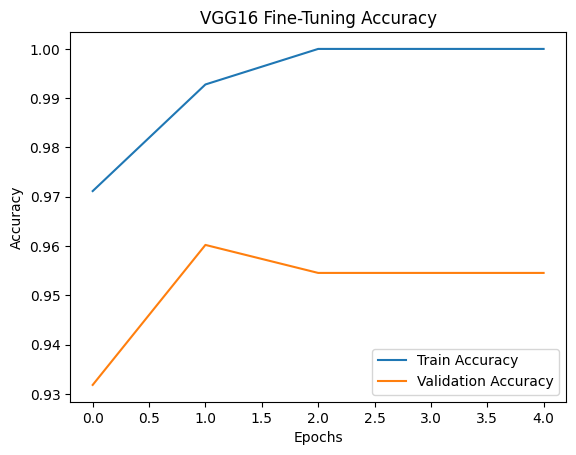

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG16 Fine-Tuning Accuracy')
plt.legend()
plt.show()